In [2]:
device = "/device:CPU:0"

In [ ]:
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'
os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'
os.environ['DNNL_ENGINE_LIMIT_CPU_CAPABILITIES'] = '0'
os.environ['ONEDNN_VERBOSE'] = '0' #'0' As i dont want to see the logs, set to '1' to see model epoch verbose logs

os.environ['ONEAPI_DEVICE_SELECTOR'] = 'opencl:*'
os.environ['SYCL_ENABLE_DEFAULT_CONTEXTS'] = '1'
os.environ['SYCL_ENABLE_FUSION_CACHING'] = '1'

Enabling oneDNN Optimizations for TensorFlow* running on Intel hardware.
Ref: https://www.intel.com/content/www/us/en/developer/articles/technical/maximize-tensorflow-performance-on-cpu-considerations-and-recommendations-for-inference.html#:~:text=Purpose-,TF_ENABLE_ONEDNN_OPTS,-True

Setting the ONEAPI_DEVICE_SELECTOR using oneAPI DPC++ Framework to use only the OpenCL devices available. Setting SYCL_ENABLE_DEFAULT_CONTEXTS = 1 which will enable creation of default platform contexts in SYCL runtime. Setting SYCL_ENABLE_FUSION_CACHING = 1 which will enable caching of JIT compilations for kernel fusion.
All the above environment variables are set for optimal performance and memory utilization.
Ref: https://intel.github.io/llvm-docs/EnvironmentVariables.html#oneapi-device-selector:~:text=Controlling%20DPC%2B%2B%20runtime

In [5]:
!pip install tensorflow==2.13.0

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.3 MB/s eta 0:00:0000:0100:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 3.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 3.4 MB/s et

In [7]:
!pip install --upgrade intel-extension-for-tensorflow[cpu]

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 3.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 1.3 MB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing

Intel® Extension for TensorFlow* aims to bring Intel CPU or GPU devices into TensorFlow open source community for AI workload acceleration.
Ref: https://github.com/intel/intel-extension-for-tensorflow#install-for-cpu:~:text=installation%20for%20details.-,Install%20for%20CPU,-pip%20install%20%2D%2Dupgrade

In [8]:
!python -c "import intel_extension_for_tensorflow as itex; print(itex.__version__)"

2024-03-08 21:11:16.267303: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-08 21:11:17.157538: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-08 21:11:18.777915: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 21:11:18.778028: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 21:11:18.786163: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

The above message "Intel Extension for Tensorflow* AVX512 CPU backend is loaded." means we are using Intel Tensorflow Operator Optimization (CPU).
Ref: https://intel.github.io/intel-extension-for-tensorflow/latest/docs/guide/features.html

In [10]:
import intel_extension_for_tensorflow as itex

In [11]:
os.environ['ITEX_XPU_BACKEND'] = 'CPU'

Enabling Advanced Automatic Mixed Precision: A Basic Configuration for Improved Inference Speed with Reduced Memory Consumption.
Ref: https://www.intel.com/content/www/us/en/developer/articles/technical/optimization-for-tensorflow-and-itex-cheat-sheet.html#:~:text=export%20ITEX_AUTO_MIXED_PRECISION%3D1%C2%A0%0Aexport%20ITEX_AUTO_MIXED_PRECISION_DATA_TYPE%3D%22BFLOAT16%22%20%23%20or%20%22FLOAT16%22

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import time
from PIL import Image,ImageOps

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model 
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG # Data augmentation için
from tensorflow.keras.preprocessing import image

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report # Confusion matrisi için
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score


print("TensorFlow Version:", tf.__version__)

2024-03-08 21:23:39,450 - matplotlib.font_manager - INFO - generated new fontManager


TensorFlow Version: 2.14.0


## Data Preprocessing

In [14]:
data_dir = "7_data/train"  
class_names = sorted(os.listdir(data_dir))  


train_datagen = ImageDataGenerator(rescale=1./127.5, validation_split=0.2) 
test_datagen = ImageDataGenerator(rescale=1./127.5)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,  
    class_mode="categorical",
    subset="training"
)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)
early_stopping = EarlyStopping(
    monitor="val_accuracy", 
    mode="max", 
    patience=3, 
    restore_best_weights=True  
)


Found 4592 images belonging to 8 classes.
Found 1146 images belonging to 8 classes.


In [15]:
os.environ['TF_ONEDNN_USE_SYSTEM_ALLOCATOR'] = '0'

Use system allocator or BFC allocator in MklCPUAllocator. In general, we set this flag to True for inference, and set this flag to False for training. So, since we are going to train our model now, we set it to False.
Ref: https://www.intel.com/content/www/us/en/developer/articles/technical/maximize-tensorflow-performance-on-cpu-considerations-and-recommendations-for-inference.html

## Creating and Training the Model

### Pretrained model Mobilenet for skin diseases

In [20]:
mobile_base = MobileNet(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
mobile_base.trainable = False  

x = mobile_base.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)  
predictions = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)

model = tf.keras.Model(inputs=mobile_base.input, outputs=predictions)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

start_time = time.time()
his=model.fit(
    train_generator, epochs=20,validation_data=validation_generator,callbacks=[early_stopping]
)
end_time = time.time()

Epoch 1/20
144/144 [==============================] - 67s 456ms/step - loss: 1.5926 - accuracy: 0.4181 - val_loss: 1.5869 - val_accuracy: 0.4407
Epoch 2/20
144/144 [==============================] - 64s 440ms/step - loss: 1.2553 - accuracy: 0.5584 - val_loss: 1.5542 - val_accuracy: 0.4398
Epoch 3/20
144/144 [==============================] - 64s 447ms/step - loss: 1.1291 - accuracy: 0.6102 - val_loss: 1.5083 - val_accuracy: 0.4817
Epoch 4/20
144/144 [==============================] - 65s 451ms/step - loss: 1.0590 - accuracy: 0.6350 - val_loss: 1.5140 - val_accuracy: 0.4869
Epoch 5/20
144/144 [==============================] - 64s 446ms/step - loss: 0.9966 - accuracy: 0.6568 - val_loss: 1.5490 - val_accuracy: 0.4834
Epoch 6/20
144/144 [==============================] - 65s 453ms/step - loss: 0.9504 - accuracy: 0.6738 - val_loss: 1.5326 - val_accuracy: 0.4843
Epoch 7/20
144/144 [==============================] - 64s 446ms/step - loss: 0.9029 - accuracy: 0.6905 - val_loss: 1.5208 - val_ac

In [21]:
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")
print(f"Execution time: {execution_time/60} minutes")

Execution time: 992.8141887187958 seconds
Execution time: 16.546903145313262 minutes


As you can see, with Intel Optimizations, the time taken for training such a large dataset took only 992.81 seconds (16.54 mins) and the accuracy is a bit higher than without oneAPI

## Model Evaluation

In [22]:
os.environ['TF_ONEDNN_USE_SYSTEM_ALLOCATOR'] = '1'

Use system allocator or BFC allocator in MklCPUAllocator. In general, we set this flag to True for inference, and set this flag to False for training. So, since we are goin to test our model now we set it to true.
Ref: https://www.intel.com/content/www/us/en/developer/articles/technical/maximize-tensorflow-performance-on-cpu-considerations-and-recommendations-for-inference.html

In [23]:
import os

os.environ['TF_ONEDNN_ASSUME_FROZEN_WEIGHTS'] = '1'

Frozen weights for inference. Better inference performance is achieved with frozen graphs.
Ref: https://www.intel.com/content/www/us/en/developer/articles/technical/maximize-tensorflow-performance-on-cpu-considerations-and-recommendations-for-inference.html#:~:text=Frozen%20weights%20for%20inference.%0ABetter%20inference%20performance%20is%20achieved%20with%20frozen%20graphs.

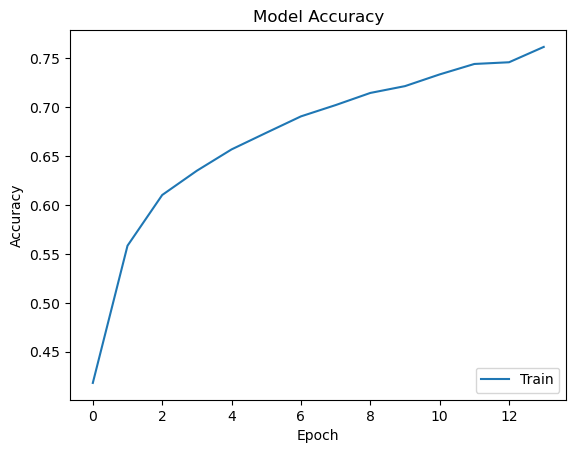

In [29]:
plt.plot(his.history['accuracy'])
##plt.plot(his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

## Testing the Model

In [27]:
def image_prediction(image_files):
    results = []  
    image = Image.open(image_files)
    np.set_printoptions(suppress=True)
    model = load_model("keras_model_5.h5", compile=False)
    class_names = open("label_5.txt", "r").readlines()
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    image_process = image.convert("RGB")
    size = (224, 224)
    image = ImageOps.fit(image_process, size, Image.Resampling.LANCZOS)
    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

    data[0] = normalized_image_array
    
    prediction = model.predict(data)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]
    
    result = "Class: " + str(class_name[2:])
    
    results.append(result)  
    

    #print("Confidence Score:", confidence_score)
    return result.strip()
result=image_prediction("zample_images/07Rhinophyma1.jpg")
print(result)

1/1 [==============================] - 1s 646ms/step
Class: Acne


## GenAI model- flan-t5

In [28]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

model_name = "google/flan-t5-xl"
#model_name="google/flan-t5-xxl"


model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

def generate_text(prompt, max_length=500, num_return_sequences=1):
    if not model or not tokenizer:
        raise ValueError("Model and tokenizer are not loaded. Please load them before using this function.")


    inputs = tokenizer(prompt, return_tensors="pt")

    outputs = model.generate(
        **inputs,
        max_length=max_length,
        num_beams=5,  
        no_repeat_ngram_size=2,  
        num_return_sequences=num_return_sequences,  
    )

    generated_texts = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    return generated_texts
x=input("Enter the disease")
prompt = f"give a berif description about {x} skin disease:"
generated_texts = generate_text(prompt)
print("Generated descriptions:")

for text in generated_texts:
    print(text)
    
prompt = f"suggest a diet for {x} skin disease:"
generated_texts = generate_text(prompt)
print(f"Diet for {x}:")

for text in generated_texts:
    print(text)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Enter the disease acne


Generated descriptions:
Acne is a skin disease characterized by the development of pimples on the skin.
Diet for acne:
A diet rich in fruits, vegetables, whole grains, lean meats, and low-fat dairy products is recommended for acne skin disease.
